<h1>Exploratory Data Analysis</h1>
<h4>By Joseph J. Bautista</h4>

<h2>Import Variables</h2>

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('fivethirtyeight')

## Load Dataset

In [2]:
df = pd.read_csv('v1-Individual-level-analysis.csv')
df.describe()

,Station,PM2.5,PM10,Gender,Age,Occupation,Civil_status,Family_history,Oily_food,Salty_food,Fruits,Vegetables,Do_you_drink,Exercise,Smoking,SBP,DBP,MAP,SBP1
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,4.583402,32.353958,53.991767,1.634025,60.352697,611.702905,64.577593,39.333610,47.796680,21.153527,57.052282,65.379253,26.046473,52.494606,24.239834,152.363485,91.082988,111.509820,0.582573
std,2.658414,13.533905,26.186152,0.481903,43.195406,472.895263,226.936883,89.671938,199.073287,133.756903,214.165257,228.149081,149.144435,206.000789,140.419098,20.115134,13.814916,13.402844,0.493339
min,1.000000,3.979000,4.139000,1.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,100.000000,50.000000,86.666667,0.000000
25%,3.000000,22.477000,39.410000,1.000000,50.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,140.000000,80.000000,103.333333,0.000000
50%,4.000000,31.120000,51.670000,2.000000,60.000000,888.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,150.000000,90.000000,110.000000,1.000000
75%,7.000000,40.110000,65.870000,2.000000,67.000000,999.000000,3.000000,24.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,2.000000,160.000000,100.000000,116.666667,1.000000
max,10.000000,81.790000,494.000000,2.000000,888.000000,999.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,280.000000,250.000000,260.000000,1.000000


In [3]:
df.head()

,Station,PM2.5,PM10,Date,Gender,Age,Occupation,Civil_status,Family_history,Oily_food,Salty_food,Fruits,Vegetables,Do_you_drink,Exercise,Smoking,SBP,DBP,MAP,SBP1
0,1,10.17,23.42,01/29/2016,1,59,1,4,2,1,1,2,1,0,3,1,140.0,90,106.666667,0
1,1,10.17,23.42,01/29/2016,2,60,0,2,3,1,1,2,2,0,3,1,120.0,90,100.000000,0
2,1,10.57,18.99,02/02/2016,2,65,999,1,1,1,1,2,2,1,3,2,160.0,90,113.333333,1
3,1,9.90,19.81,02/03/2016,1,61,999,2,2,0,1,1,2,0,3,1,150.0,80,103.333333,1
4,1,9.90,19.81,02/03/2016,2,65,0,3,2,0,0,1,1,0,3,1,140.0,90,106.666667,0


<h2>Correlation Heatmaps</h2>
<p>All values (in absolute value terms) that were less than 0.3 were removed to make the graphs cleaner.</p>

In [4]:
df = df.drop(["Date"], axis=1)
df_corr_pearson = np.round(df.corr(method='pearson'), 2)
df_corr_spearman = np.round(df.corr(method='spearman'), 2)

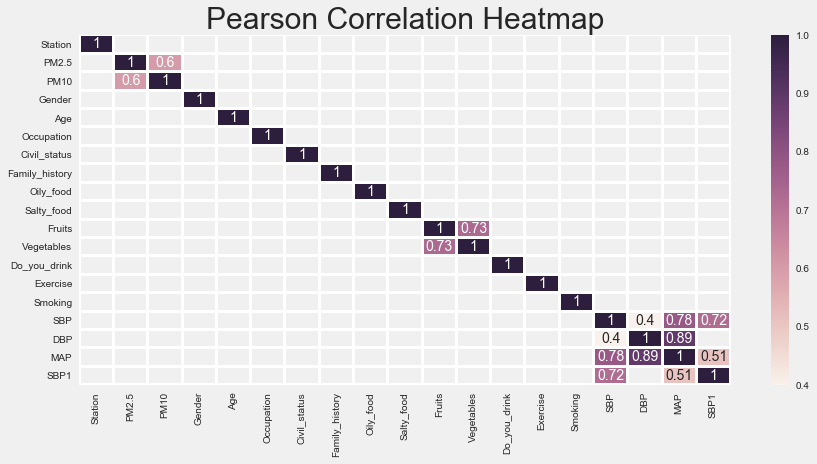

In [5]:
plt.figure(figsize=(13,6))
plt.title("Pearson Correlation Heatmap", fontsize=30)
sns.heatmap(df_corr_pearson[np.abs(df_corr_pearson) > 0.3], annot=True, linewidths=2)

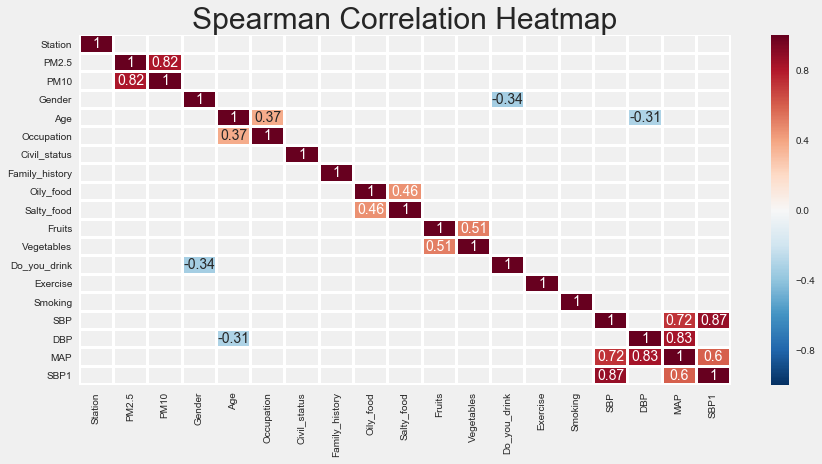

In [6]:
plt.figure(figsize=(13,6))
plt.title("Spearman Correlation Heatmap", fontsize=30)
sns.heatmap(df_corr_spearman[np.abs(df_corr_spearman) > 0.3], annot=True, linewidths=2)

<h2>Investigate Hypertension Correlations</h2>
<p>Hypertension variables (SBP, DBP, MAP, and SBP1) are given to be correlated with each other. The only one that correlated with a non-hypertension variables was DBP with Age.</p>
<p>NOTE: The PM variables (PM2.5 and PM10) did not correlate with anything else.</p>
<p>There are ages above 120. Weird.</p>

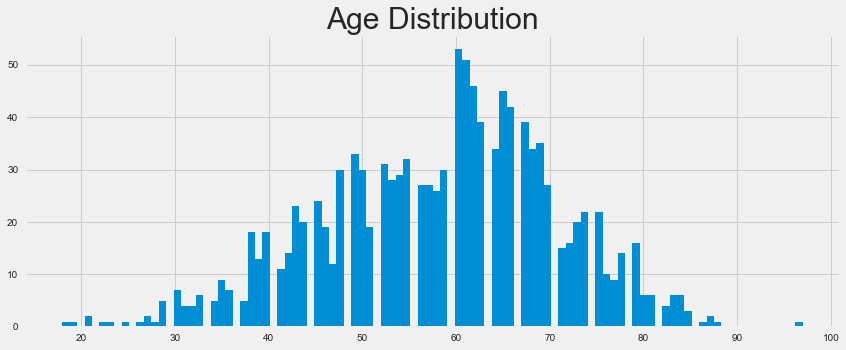

In [7]:
plt.figure(figsize=(13,5))
plt.title("Age Distribution", fontsize=30)
df["Age"][df["Age"] < 120].hist(bins=100)

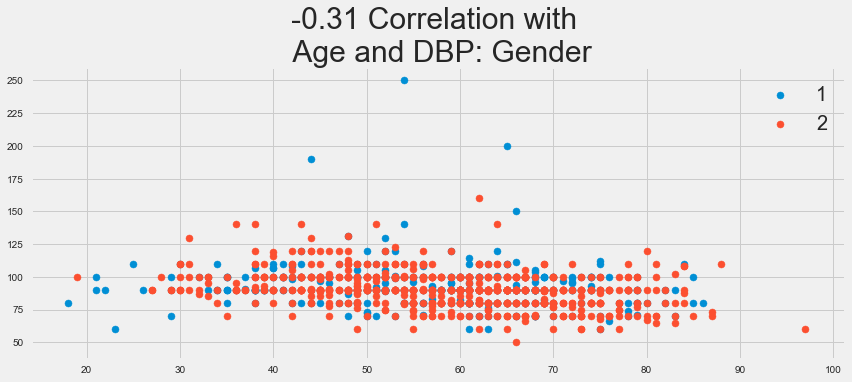

In [8]:
plt.figure(figsize=(13,5))
plt.title("-0.31 Correlation with \n Age and DBP: Gender", fontsize=30)
plt.scatter(df["Age"][(df["Gender"] == 1) & (df["Age"] < 120)], df["DBP"][(df["Gender"] == 1) & (df["Age"] < 120)], label="1")
plt.scatter(df["Age"][(df["Gender"] == 2) & (df["Age"] < 120)], df["DBP"][(df["Gender"] == 2) & (df["Age"] < 120)], label="2")
plt.legend(loc="upper right", fontsize=20)

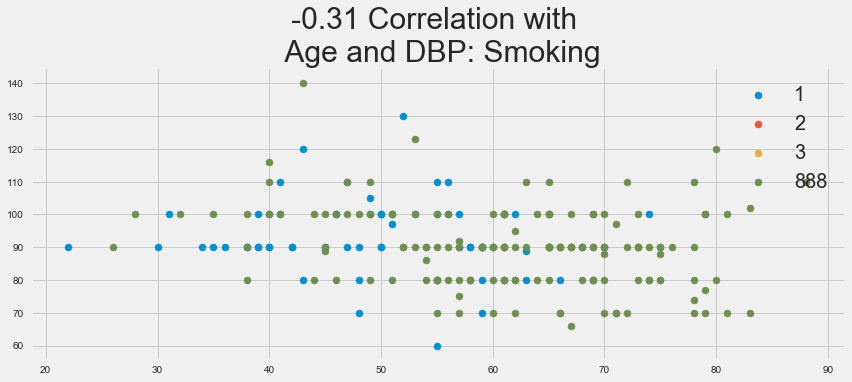

In [9]:
plt.figure(figsize=(13,5))
plt.title("-0.31 Correlation with \n Age and DBP: Smoking", fontsize=30)
plt.scatter(df["Age"][(df["Occupation"] == 1) & (df["Age"] < 120)], df["DBP"][(df["Occupation"] == 1) & (df["Age"] < 120)], label="1")

plt.scatter(df["Age"][(df["Occupation"] == 2) & (df["Age"] < 120)], df["DBP"][(df["Occupation"] == 2) & (df["Age"] < 120)], label="2")
plt.legend(loc="upper right", fontsize=20)

plt.scatter(df["Age"][(df["Occupation"] == 3) & (df["Age"] < 120)], df["DBP"][(df["Occupation"] == 3) & (df["Age"] < 120)], label="3")
plt.legend(loc="upper right", fontsize=20)

plt.scatter(df["Age"][(df["Occupation"] == 888) & (df["Age"] < 120)], df["DBP"][(df["Occupation"] == 888) & (df["Age"] < 120)], label="888")
plt.legend(loc="upper right", fontsize=20)

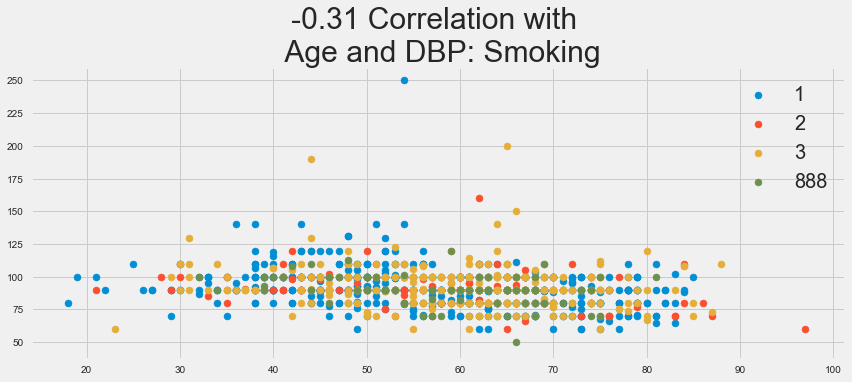

In [10]:
plt.figure(figsize=(13,5))
plt.title("-0.31 Correlation with \n Age and DBP: Smoking", fontsize=30)
plt.scatter(df["Age"][(df["Exercise"] == 1) & (df["Age"] < 120)], df["DBP"][(df["Exercise"] == 1) & (df["Age"] < 120)], label="1")

plt.scatter(df["Age"][(df["Exercise"] == 2) & (df["Age"] < 120)], df["DBP"][(df["Exercise"] == 2) & (df["Age"] < 120)], label="2")
plt.legend(loc="upper right", fontsize=20)

plt.scatter(df["Age"][(df["Exercise"] == 3) & (df["Age"] < 120)], df["DBP"][(df["Exercise"] == 3) & (df["Age"] < 120)], label="3")
plt.legend(loc="upper right", fontsize=20)

plt.scatter(df["Age"][(df["Exercise"] == 888) & (df["Age"] < 120)], df["DBP"][(df["Exercise"] == 888) & (df["Age"] < 120)], label="888")
plt.legend(loc="upper right", fontsize=20)

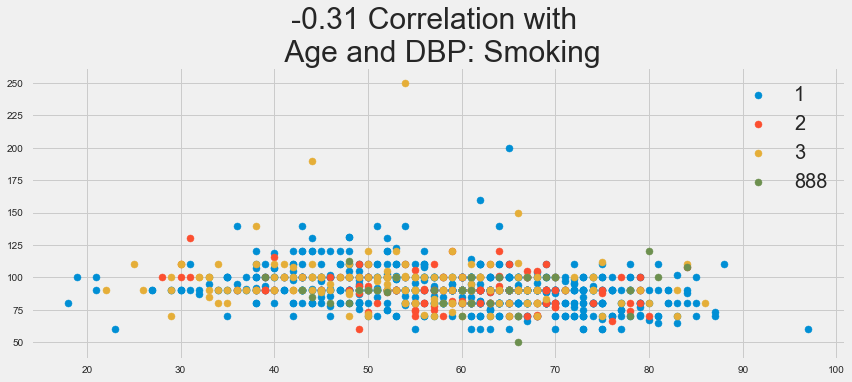

In [11]:
plt.figure(figsize=(13,5))
plt.title("-0.31 Correlation with \n Age and DBP: Smoking", fontsize=30)
plt.scatter(df["Age"][(df["Smoking"] == 1) & (df["Age"] < 120)], df["DBP"][(df["Smoking"] == 1) & (df["Age"] < 120)], label="1")

plt.scatter(df["Age"][(df["Smoking"] == 2) & (df["Age"] < 120)], df["DBP"][(df["Smoking"] == 2) & (df["Age"] < 120)], label="2")
plt.legend(loc="upper right", fontsize=20)

plt.scatter(df["Age"][(df["Smoking"] == 3) & (df["Age"] < 120)], df["DBP"][(df["Smoking"] == 3) & (df["Age"] < 120)], label="3")
plt.legend(loc="upper right", fontsize=20)

plt.scatter(df["Age"][(df["Smoking"] == 888) & (df["Age"] < 120)], df["DBP"][(df["Smoking"] == 888) & (df["Age"] < 120)], label="888")
plt.legend(loc="upper right", fontsize=20)

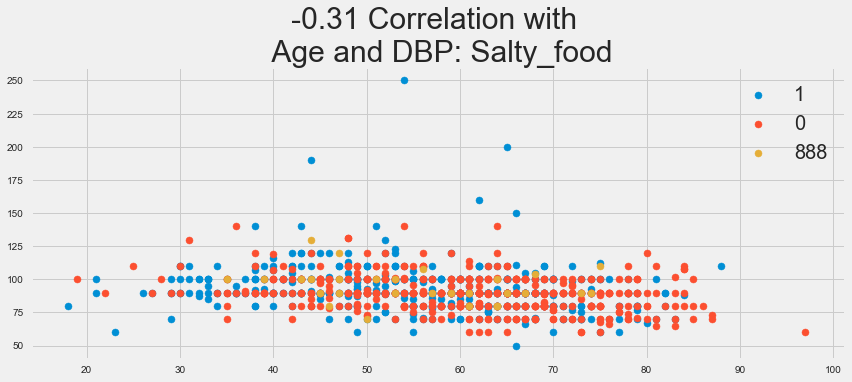

In [12]:
plt.figure(figsize=(13,5))
plt.title("-0.31 Correlation with \n Age and DBP: Salty_food", fontsize=30)
plt.scatter(df["Age"][(df["Salty_food"] == 1) & (df["Age"] < 120)], df["DBP"][(df["Salty_food"] == 1) & (df["Age"] < 120)], label="1")

plt.scatter(df["Age"][(df["Salty_food"] == 0) & (df["Age"] < 120)], df["DBP"][(df["Salty_food"] == 0) & (df["Age"] < 120)], label="0")
plt.legend(loc="upper right", fontsize=20)

plt.scatter(df["Age"][(df["Salty_food"] == 888) & (df["Age"] < 120)], df["DBP"][(df["Salty_food"] == 888) & (df["Age"] < 120)], label="888")
plt.legend(loc="upper right", fontsize=20)

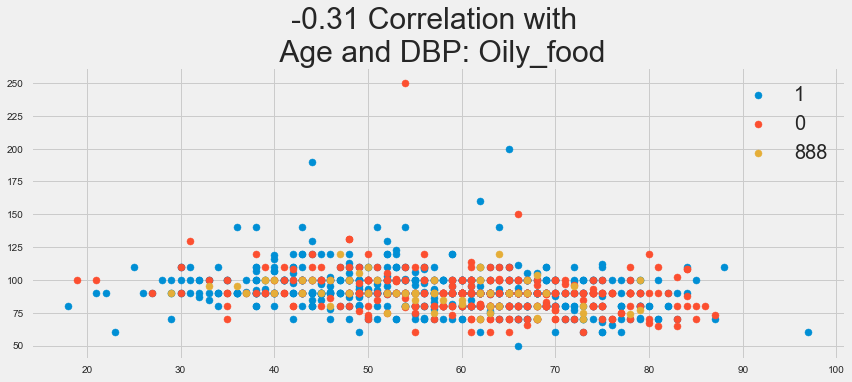

In [13]:
plt.figure(figsize=(13,5))
plt.title("-0.31 Correlation with \n Age and DBP: Oily_food", fontsize=30)
plt.scatter(df["Age"][(df["Oily_food"] == 1) & (df["Age"] < 120)], df["DBP"][(df["Oily_food"] == 1) & (df["Age"] < 120)], label="1")

plt.scatter(df["Age"][(df["Oily_food"] == 0) & (df["Age"] < 120)], df["DBP"][(df["Oily_food"] == 0) & (df["Age"] < 120)], label="0")
plt.legend(loc="upper right", fontsize=20)

plt.scatter(df["Age"][(df["Oily_food"] == 888) & (df["Age"] < 120)], df["DBP"][(df["Oily_food"] == 888) & (df["Age"] < 120)], label="888")
plt.legend(loc="upper right", fontsize=20)

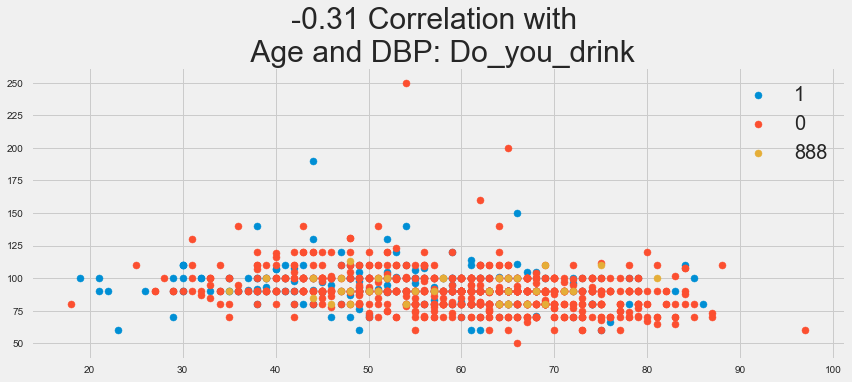

In [14]:
plt.figure(figsize=(13,5))
plt.title("-0.31 Correlation with \n Age and DBP: Do_you_drink", fontsize=30)
plt.scatter(df["Age"][(df["Do_you_drink"] == 1) & (df["Age"] < 120)], df["DBP"][(df["Do_you_drink"] == 1) & (df["Age"] < 120)], label="1")

plt.scatter(df["Age"][(df["Do_you_drink"] == 0) & (df["Age"] < 120)], df["DBP"][(df["Do_you_drink"] == 0) & (df["Age"] < 120)], label="0")
plt.legend(loc="upper right", fontsize=20)

plt.scatter(df["Age"][(df["Do_you_drink"] == 888) & (df["Age"] < 120)], df["DBP"][(df["Do_you_drink"] == 888) & (df["Age"] < 120)], label="888")
plt.legend(loc="upper right", fontsize=20)

<h3>CONCLUSION: Although there exists a negative correlation between Age and DBP, there does not seem to be an explanatory variable that properly splits the data in two</h3>

<h2>Dimensionality Reduction</h2>
<p>This was done just to see if there's an internal structure to the data that splits it in higher dimensions.</p>

In [15]:
from sklearn.decomposition import PCA

<h3>PMA2.5: 18 Dimensions to 2</h3>

In [17]:
X_25 = df.drop(["PM10"], axis=1)

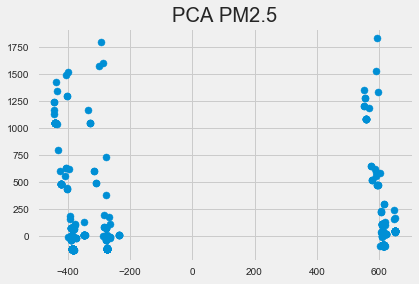

In [18]:
pca_25 = PCA()
X_25_new = pca_25.fit_transform(X_25)
plt.title("PCA PM2.5")
plt.scatter(X_25_new[:,0], X_25_new[:,1])

In [19]:
df_pca_25 = df.drop(["PM10", "PM2.5"], axis=1)
df_pca_25['X0'] = X_25_new[:,0]
df_pca_25['X1'] = X_25_new[:,1]
df_pca_25.head()

,Station,Gender,Age,Occupation,Civil_status,Family_history,Oily_food,Salty_food,Fruits,Vegetables,Do_you_drink,Exercise,Smoking,SBP,DBP,MAP,SBP1,X0,X1
0,1,1,59,1,4,2,1,1,2,1,0,3,1,140.0,90,106.666667,0,611.358834,-90.233037
1,1,2,60,0,2,3,1,1,2,2,0,3,1,120.0,90,100.000000,0,612.385424,-89.900477
2,1,2,65,999,1,1,1,1,2,2,1,3,2,160.0,90,113.333333,1,-384.605722,-126.000994
3,1,1,61,999,2,2,0,1,1,2,0,3,1,150.0,80,103.333333,1,-384.586212,-126.974889
4,1,2,65,0,3,2,0,0,1,1,0,3,1,140.0,90,106.666667,0,612.277570,-91.268855


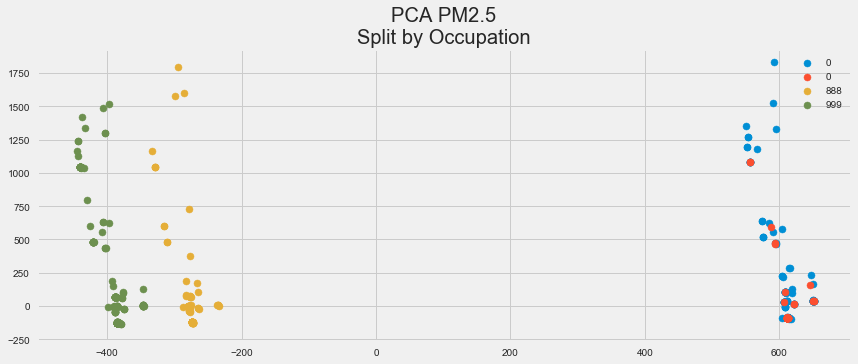

In [20]:
plt.figure(figsize=(13,5))
plt.title("PCA PM2.5\nSplit by Occupation")

plt.scatter(df_pca_25["X0"][df_pca_25["Occupation"] == 0], df_pca_25["X1"][df_pca_25["Occupation"] == 0], label="0")
plt.scatter(df_pca_25["X0"][df_pca_25["Occupation"] == 1], df_pca_25["X1"][df_pca_25["Occupation"] == 1], label="0")
plt.scatter(df_pca_25["X0"][df_pca_25["Occupation"] == 888], df_pca_25["X1"][df_pca_25["Occupation"] == 888], label="888")
plt.scatter(df_pca_25["X0"][df_pca_25["Occupation"] == 999], df_pca_25["X1"][df_pca_25["Occupation"] == 999], label="999")

plt.legend(loc="upper right", fontsize=10)

<h3>PMA10: 18 Dimensions to 2</h3>

In [21]:
X_10 = df.drop(["PM10"], axis=1)

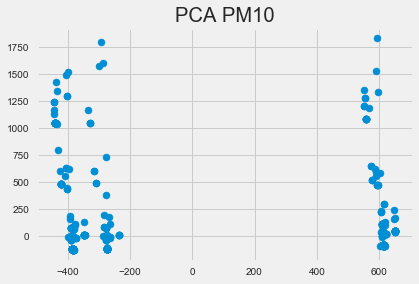

In [22]:
pca_10 = PCA()
X_10_new = pca_10.fit_transform(X_10)
plt.title("PCA PM10")
plt.scatter(X_10_new[:,0], X_10_new[:,1])

In [23]:
df_pca_10 = df.drop(["PM10", "PM2.5"], axis=1)
df_pca_10['X0'] = X_10_new[:,0]
df_pca_10['X1'] = X_10_new[:,1]
df_pca_25.head()

,Station,Gender,Age,Occupation,Civil_status,Family_history,Oily_food,Salty_food,Fruits,Vegetables,Do_you_drink,Exercise,Smoking,SBP,DBP,MAP,SBP1,X0,X1
0,1,1,59,1,4,2,1,1,2,1,0,3,1,140.0,90,106.666667,0,611.358834,-90.233037
1,1,2,60,0,2,3,1,1,2,2,0,3,1,120.0,90,100.000000,0,612.385424,-89.900477
2,1,2,65,999,1,1,1,1,2,2,1,3,2,160.0,90,113.333333,1,-384.605722,-126.000994
3,1,1,61,999,2,2,0,1,1,2,0,3,1,150.0,80,103.333333,1,-384.586212,-126.974889
4,1,2,65,0,3,2,0,0,1,1,0,3,1,140.0,90,106.666667,0,612.277570,-91.268855


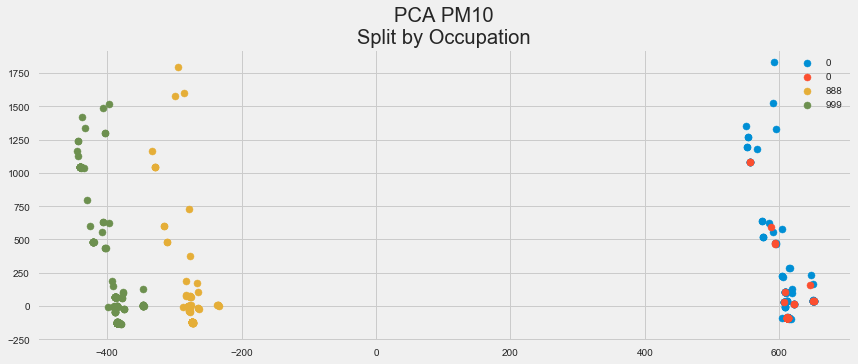

In [24]:
plt.figure(figsize=(13,5))
plt.title("PCA PM10\nSplit by Occupation")

plt.scatter(df_pca_10["X0"][df_pca_10["Occupation"] == 0], df_pca_10["X1"][df_pca_10["Occupation"] == 0], label="0")
plt.scatter(df_pca_10["X0"][df_pca_10["Occupation"] == 1], df_pca_10["X1"][df_pca_10["Occupation"] == 1], label="0")
plt.scatter(df_pca_10["X0"][df_pca_10["Occupation"] == 888], df_pca_10["X1"][df_pca_10["Occupation"] == 888], label="888")
plt.scatter(df_pca_10["X0"][df_pca_10["Occupation"] == 999], df_pca_10["X1"][df_pca_10["Occupation"] == 999], label="999")

plt.legend(loc="upper right", fontsize=10)